*Intorduction*

In this project, I analyzed a retail sales dataset to better understand customer behavior and sales trends. The analysis focuses on how sales vary across product categories, gender, age groups, and over time. These insights help highlight key customer segments and can support more informed business and marketing decisions.*italicized text*

In [119]:
import pandas as pd

df = pd.read_csv("/retail_sales_dataset.csv")

In [120]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [121]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [122]:
sales_by_category = (
    df.groupby("Product Category")["Total Amount"]
      .sum()
      .reset_index()
      .sort_values(by="Total Amount", ascending=False)
)

sales_by_category


,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


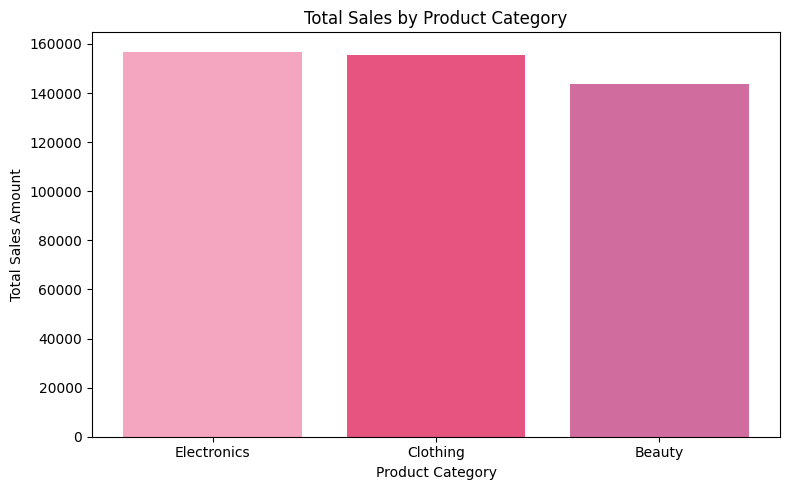

In [123]:
import matplotlib.pyplot as plt

# Calculate total sales by product category
sales_by_category = (
    df.groupby("Product Category")["Total Amount"]
      .sum()
      .sort_values(ascending=False)
)

colors = ["#F4A6C1", "#E75480", "#D16C9E"]

#Create bar sheet
plt.figure(figsize=(8,5))
plt.bar(sales_by_category.index, sales_by_category.values, color = colors )

plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")

plt.tight_layout()
plt.show()

From the analysis, I can see clothing is the top-performing category in terms of total sales, which suggests strong and consistent customer demand. Electronics follows behind, while Beauty has the lowest sales overall. Based on this, prioritizing Clothing and Electronics could lead to better business outcomes.

In [124]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [125]:
# Total sales over time
sales_over_time = (
    df.groupby("Date")["Total Amount"]
    .sum()
    .reset_index()
    .sort_values("Date")
)

sales_over_time.head()

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100


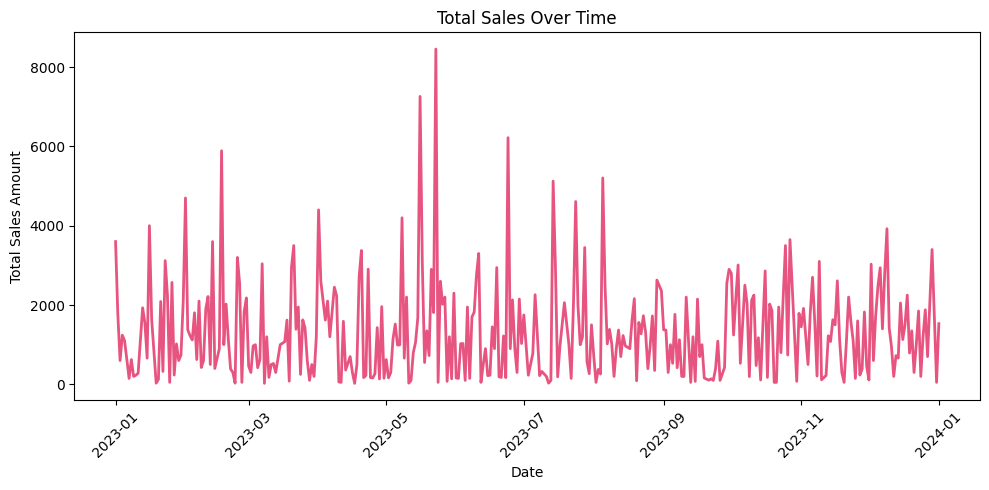

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    sales_over_time["Date"],
    sales_over_time["Total Amount"],
    color="#E75480",
    linewidth=2
)

plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total sales vary a lot from day to day, with noticeable spikes throughout the time period instead of a smooth trend. This indicates that sales are driven by daily transaction volume and possibly promotions or seasonal effects. Despite the fluctuations, sales remain consistent overall, suggesting stable customer demand rather than long-term growth or decline.

In [127]:
# Total sales by gender
sales_by_gender = (
    df.groupby("Gender")["Total Amount"]
    .sum()
    .reset_index()
)

sales_by_gender


,Gender,Total Amount
0,Female,232840
1,Male,223160


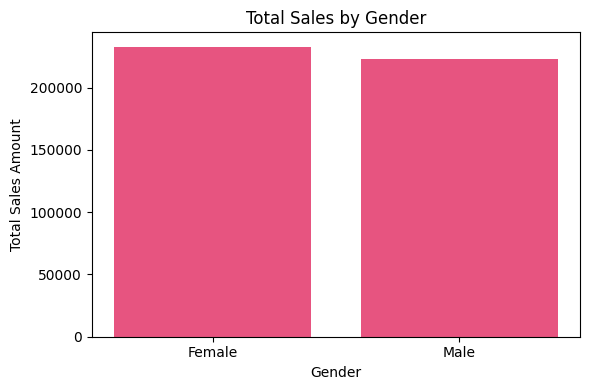

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    sales_by_gender["Gender"],
    sales_by_gender["Total Amount"],
    color="#E75480"
)

plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()

Female customers contribute slightly more to overall sales than male customers. Although the gap is not very large, it highlights subtle differences in purchasing behavior that businesses can use to better target marketing and customer engagement strategies.

In [129]:
# Create age groups
df["Age Group"] = pd.cut(
    df["Age"],
    bins=[17, 25, 35, 45, 55, 65],
    labels=["18–25", "26–35", "36–45", "46–55", "56–65"]
)

df[["Age", "Age Group"]].head()



,Age,Age Group
0,34,26–35
1,26,26–35
2,50,46–55
3,37,36–45
4,30,26–35


In [130]:
avg_sales_by_age = (
    df.groupby("Age Group")["Total Amount"]
    .mean()
    .reset_index()
)

avg_sales_by_age


/tmp/ipython-input-2496736980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age Group")["Total Amount"]


,Age Group,Total Amount
0,18–25,500.295858
1,26–35,480.390244
2,36–45,454.801980
3,46–55,439.694323
4,56–65,412.358974


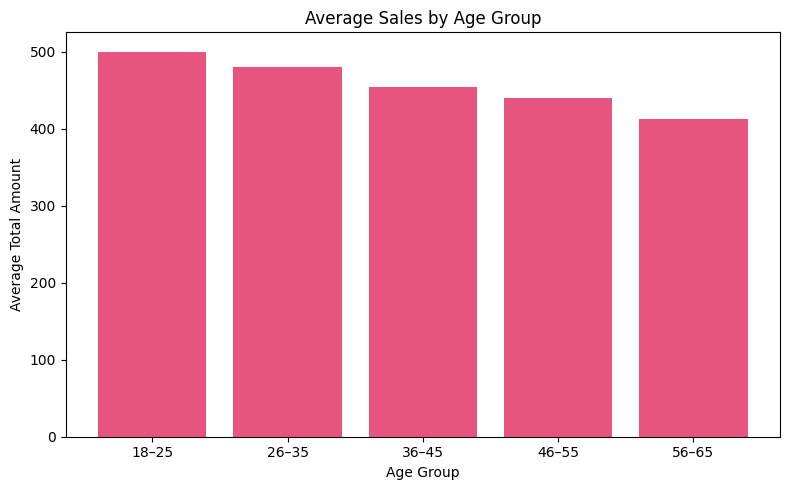

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    avg_sales_by_age["Age Group"],
    avg_sales_by_age["Total Amount"],
    color="#E75480"  # pink
)

plt.title("Average Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Amount")
plt.tight_layout()
plt.show()


Younger age groups appear to spend slightly more on average than older customers, which may indicate different shopping habits or spending priorities across age ranges. This insight can help businesses design targeted promotions and product strategies that better align with high-spending age groups.


*Conclusion*

This analysis shows that customer behavior isn’t random — spending patterns vary by product category, age group, gender, and time. By breaking down the data, it becomes easier to see which customer segments contribute the most to overall sales. These insights can help businesses make smarter decisions around promotions, targeting, and product strategy.